In [1]:
import pandas as pd
import seaborn as sns
import requests
sns.set(style="darkgrid")

## define functions

In [2]:
def url2df(url):
  f = requests.get(url)
  df = pd.read_json(f.text)
  df.scannedDevicesMinTimestamp= pd.to_datetime(df.scannedDevicesMinTimestamp)
  df.scannedDevicesMaxTimestamp= pd.to_datetime(df.scannedDevicesMaxTimestamp)
  df = df.rename(columns={'scannedDevicesMinTimestamp': 'scannedDevicesMinUTC',
                    'scannedDevicesMaxTimestamp': 'scannedDevicesMaxUTC'})
  df = df.sort_values("scannedDevicesMaxUTC") # sorting by last time!
  return df

In [3]:
def scannedDevices2df(scannedDevices):
  df = pd.json_normalize(scannedDevices)
  df.timestamp= pd.to_datetime(df.timestamp)
  df = df.rename(columns={'timestamp': 'timeUTC'})
  df = df.sort_values("timeUTC")
  return df

In [4]:
def allScannedDevicesInTime(df, rel_time, window_size_minutes=0):
# rel_time = pd.to_datetime("2020-03-25 13:00:00")
    time_window = pd.offsets.Minute(window_size_minutes)
    mask = (df.scannedDevicesMinUTC <= rel_time+time_window) & (df.scannedDevicesMaxUTC >= rel_time-time_window)
    sd = pd.DataFrame()
    for row in df[mask].index:
        sd_new = scannedDevices2df(df.scannedDevices[row])
        sd = pd.concat([sd, sd_new], ignore_index=True)
    return sd

## access raw data

#### Jonatan's Pocophone

In [6]:
url1 = "https://us-central1-social-protection-46da6.cloudfunctions.net/getDeviceScans?device_id=7BB8BD884D95DBBD613526BE32778B20"
df1 = url2df(url=url1)
df1.tail()

,device_seen_set,scannedDevicesMinUTC,scannedDevices,scannedDevicesMaxUTC,scanningDeviceEddystoneUid
3,"[7BB8BD884D95DBBD613588BD06DA4164, 7BB8BD884D9...",2020-03-25 14:14:25.754478800,"[{'rssi': -78, 'scannedDeviceRangingData': -15...",2020-03-25 14:17:10.484300000,7BB8BD884D95DBBD613526BE32778B20
11,"[7BB8BD884D95DBBD613588BD06DA4164, 7BB8BD884D9...",2020-03-25 14:02:46.142586600,"[{'rssi': -72, 'scannedDeviceRangingData': -15...",2020-03-25 14:17:10.484450300,7BB8BD884D95DBBD613526BE32778B20
10,"[7BB8BD884D95DBBD613588BD06DA4164, 7BB8BD884D9...",2020-03-25 14:26:49.949664300,"[{'rssi': -53, 'scannedDeviceRangingData': -15...",2020-03-25 14:28:59.289772500,7BB8BD884D95DBBD613526BE32778B20
16,"[7BB8BD884D95DBBD613588BD06DA4164, 7BB8BD884D9...",2020-03-25 14:27:34.617214700,"[{'rssi': -78, 'scannedDeviceRangingData': -15...",2020-03-25 14:28:59.290272800,7BB8BD884D95DBBD613526BE32778B20
6,"[7BB8BD884D95DBBD613588BD06DA4164, 7BB8BD884D9...",2020-03-25 14:27:41.768124700,"[{'rssi': -47, 'scannedDeviceRangingData': -15...",2020-03-25 14:28:59.290964700,7BB8BD884D95DBBD613526BE32778B20


#### Dor's OnePlus6

In [7]:
url2 = "https://us-central1-social-protection-46da6.cloudfunctions.net/getDeviceScans?device_id=7BB8BD884D95DBBD613588BD06DA4164" 
df2 = url2df(url=url2)
df2.tail()

,device_seen_set,scannedDevicesMinUTC,scannedDevices,scannedDevicesMaxUTC,scanningDeviceEddystoneUid
7,"[7BB8BD884D95DBBD613526BE32778B20, 7BB8BD884D9...",2020-03-25 14:15:04.812595000,"[{'scannedDeviceRangingData': -15, 'scannedDev...",2020-03-25 15:02:59.009854500,7BB8BD884D95DBBD613588BD06DA4164
12,"[7BB8BD884D95DBBD613526BE32778B20, 7BB8BD884D9...",2020-03-25 14:15:12.818662000,"[{'scannedDeviceRangingData': -15, 'scannedDev...",2020-03-25 15:04:17.381249500,7BB8BD884D95DBBD613588BD06DA4164
6,"[7BB8BD884D95DBBD613526BE32778B20, 7BB8BD884D9...",2020-03-25 14:15:12.819116800,"[{'scannedDeviceRangingData': -15, 'scannedDev...",2020-03-25 15:04:26.782329000,7BB8BD884D95DBBD613588BD06DA4164
5,"[7BB8BD884D95DBBD613526BE32778B20, 7BB8BD884D9...",2020-03-25 14:15:23.417185500,"[{'scannedDeviceRangingData': -15, 'scannedDev...",2020-03-25 15:05:28.128764700,7BB8BD884D95DBBD613588BD06DA4164
3,"[7BB8BD884D95DBBD613526BE32778B20, 7BB8BD884D9...",2020-03-25 15:19:03.342868500,"[{'rssi': -83, 'scannedDeviceRangingData': -15...",2020-03-25 15:51:02.361047300,7BB8BD884D95DBBD613588BD06DA4164


## find relevant rows in time

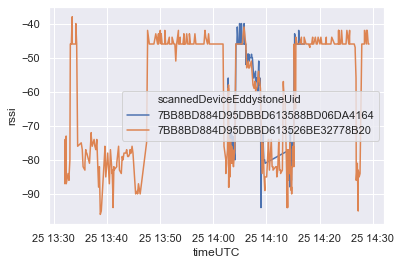

In [13]:
rel_time = pd.to_datetime("2020-03-25 14:00:00")
sd1 = allScannedDevicesInTime(df1, rel_time, 5)
sd2 = allScannedDevicesInTime(df2, rel_time, 5)
sd = pd.concat([sd1, sd2], ignore_index=True)
sns.lineplot(x="timeUTC", y="rssi", hue="scannedDeviceEddystoneUid", markers=True, data=sd)